<a href="https://colab.research.google.com/github/ankitkarmakar95/Manage_employee_exit_using_neural_netwrok/blob/main/Manage_employee_exit_using_neural_netwrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries imported

In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Importing Data and basic description

In [116]:
emp_exit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_comma_sep.csv')

In [117]:
emp_exit.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [118]:
emp_exit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [119]:
emp_exit.shape

(14999, 10)

In [120]:
emp_exit.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data cleansing & EDA

In [121]:
emp_exit.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [122]:
emp_exit[emp_exit.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [123]:
emp_exit.drop(emp_exit[emp_exit.duplicated()].index,inplace=True)

In [124]:
emp_exit[emp_exit.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary


In [125]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(emp_exit[["number_project","average_montly_hours","time_spend_company"]])
emp_exit["number_project"] = scaled_values[:,0]
emp_exit["average_montly_hours"] = scaled_values[:,1]
emp_exit["time_spend_company"] = scaled_values[:,2]
emp_data=emp_exit
emp_exit.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,0.0,0.285047,0.125,0,1,0,sales,low
1,0.80,0.86,0.6,0.775701,0.500,0,1,0,sales,medium
2,0.11,0.88,1.0,0.822430,0.250,0,1,0,sales,medium
3,0.72,0.87,0.6,0.593458,0.375,0,1,0,sales,low
4,0.37,0.52,0.0,0.294393,0.125,0,1,0,sales,low


In [126]:
catfiltrs = ["Department","salary"]
emp_exit = pd.get_dummies(emp_exit,columns = catfiltrs)
emp_exit.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

# Data analysis & visualisation

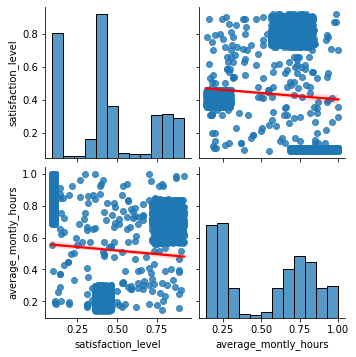

In [106]:
#To find a relation between satisfaction and hour of work from the reviews of the employees who left the organisation
empext = emp_exit[emp_exit.left==1]

df = empext[["satisfaction_level","average_montly_hours"]]
sns.pairplot(df,kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()


In [107]:
#Correlation between different features
empext[["satisfaction_level","promotion_last_5years","average_montly_hours","last_evaluation","number_project","time_spend_company","Work_accident"]].corr()

,satisfaction_level,promotion_last_5years,average_montly_hours,last_evaluation,number_project,time_spend_company,Work_accident
satisfaction_level,1.000000,0.012512,-0.084021,0.182685,-0.231109,0.439994,0.004674
promotion_last_5years,0.012512,1.000000,-0.030615,-0.034763,-0.030889,-0.033034,0.056058
average_montly_hours,-0.084021,-0.030615,1.000000,0.831147,0.872406,0.669503,-0.014669
last_evaluation,0.182685,-0.034763,0.831147,1.000000,0.803898,0.781059,-0.002701
number_project,-0.231109,-0.030889,0.872406,0.803898,1.000000,0.602032,-0.013316
time_spend_company,0.439994,-0.033034,0.669503,0.781059,0.602032,1.000000,-0.003586
Work_accident,0.004674,0.056058,-0.014669,-0.002701,-0.013316,-0.003586,1.000000


<ipython-input-108-25454665370e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bins"]=s


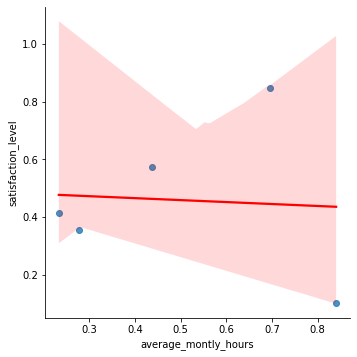

In [108]:
#using qcut feature to get the quartile of the data
s = pd.qcut(x=df.satisfaction_level, q=5,labels=['a','b','c','d','e'] )
df["bins"]=s
dfbin=df.groupby(['bins']).mean()
sns.pairplot(dfbin,
             x_vars = "average_montly_hours",y_vars="satisfaction_level",
             height=5,kind="reg", plot_kws={'line_kws':{'color':'red'}})

So, from the plots we can see there are plenty of values in all the regions, but the satisfaction level decreases with the increase of work hour. However this is not conclusive as satisfaction depends on many other aspects, which was described in the corelation matrics.

Let us understand the effect of satisfaction level, department, promotion in last 5 years and salary level of employees who have left the organization.

In [109]:
#Will use randomforest for finding the importance of these features.
model = RandomForestClassifier(n_estimators=1000,
                               min_samples_split=5,
                               min_impurity_decrease=0.0005)

x=emp_exit.columns.drop("left")
X=emp_exit[x]
Y=emp_exit["left"]
model.fit(X,Y)
train_accuracy = model.score(X,Y)
print("train_accuracy = ", train_accuracy )


train_accuracy =  0.9436243849553833


In [110]:
features = X.columns
feature_imps = pd.DataFrame(np.array([features,
                                      model.feature_importances_]).T,
                            columns=["feature","importance"])
feature_imps.sort_values(by="importance",ascending=False)


,feature,importance
0,satisfaction_level,0.35798
2,number_project,0.205714
3,average_montly_hours,0.152641
4,time_spend_company,0.147507
1,last_evaluation,0.094661
5,Work_accident,0.015621
17,salary_high,0.009059
18,salary_low,0.008351
6,promotion_last_5years,0.006896
19,salary_medium,0.00119


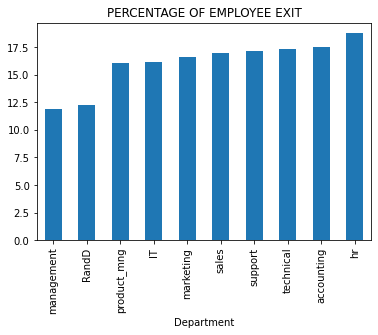

In [166]:
emp_data_left  = emp_data[emp_data.left == 1]
Dep_data=pd.DataFrame()
Dep_data["left"] = emp_data_left.groupby(['Department'])["left"].count()
Dep_data["total"] = emp_data.groupby(['Department'])["left"].count()
Dep_data["exit_percentage"]=Dep_data["left"]/Dep_data["total"]*100
Dep_data["exit_percentage"].sort_values(ascending=True).plot(kind='bar',title='PERCENTAGE OF EMPLOYEE EXIT')

SO, we can conclude that management department has the lowest exit cases, and mostly satisfaction level helps to take decision about exit. Also HR department has the most highest exit

Need to understand why HR department has the most exit rate

In [167]:
empext[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]][emp_data.Department=="hr"].describe()

<ipython-input-167-37e40b4dd17f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  empext[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years"]][emp_data.Department=="hr"].describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0
mean,0.422478,0.678673,0.307965,0.472211,0.213496,0.044248,0.0
std,0.243232,0.194310,0.356606,0.291595,0.112898,0.206561,0.0
min,0.090000,0.450000,0.000000,0.140187,0.125000,0.000000,0.0
25%,0.360000,0.500000,0.000000,0.214953,0.125000,0.000000,0.0
50%,0.420000,0.570000,0.000000,0.285047,0.125000,0.000000,0.0
75%,0.450000,0.870000,0.600000,0.728972,0.250000,0.000000,0.0
max,0.910000,1.000000,1.000000,1.000000,0.500000,1.000000,0.0


So, hr devision has got no promotion in the last 5 years, and last evaluation value is also very high. That is why they have more tendancy of exit than any other departments.

# Model building for predicting employee exit

We will use MLPClassifier for this problem

In [168]:
nn_model = MLPClassifier(hidden_layer_sizes=(100))
X_train,X_test,y_train,y_test = train_test_split(emp_exit.drop("left",axis=1),emp_exit["left"],test_size=0.1,random_state=100)
nn_model.fit(X_train,y_train)
testAcc= nn_model.score(X_test,y_test)
trainAcc= nn_model.score(X_train,y_train)
print("test accuracy : ", testAcc)
print("train accuracy : ", trainAcc)

test accuracy :  0.9625
train accuracy :  0.9716430358632193


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Outcome

In [170]:
#confusion matrix for prediction analysis
predicted_digit = nn_model.predict(X_train)
pd.DataFrame(confusion_matrix(y_train,predicted_digit),
             index=range(0,2),columns=range(0,2))

,0,1
0,8859,142
1,164,1626


In [171]:
# report based on tain data
print(classification_report(y_train,predicted_digit))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9001
           1       0.92      0.91      0.91      1790

    accuracy                           0.97     10791
   macro avg       0.95      0.95      0.95     10791
weighted avg       0.97      0.97      0.97     10791

